# Jay Bhanushali (60009200047)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,f1_score
from sklearn.model_selection import train_test_split

## Logstic regression using Sklearn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


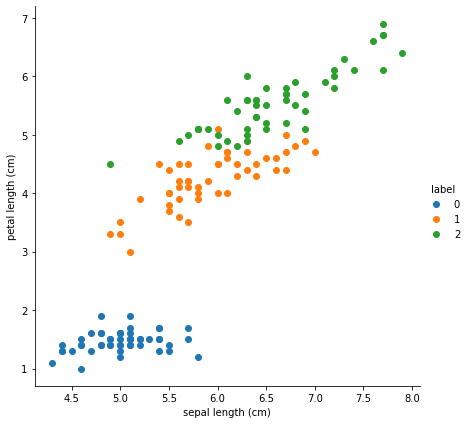

In [3]:
sns.FacetGrid(df, hue ="label",
			height = 6).map(plt.scatter,'sepal length (cm)','petal length (cm)').add_legend()

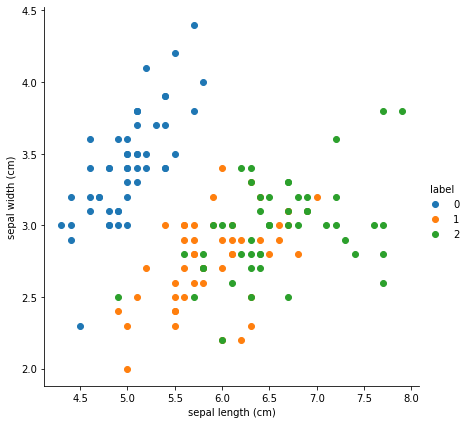

In [4]:
sns.FacetGrid(df, hue ="label",
			height = 6).map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()

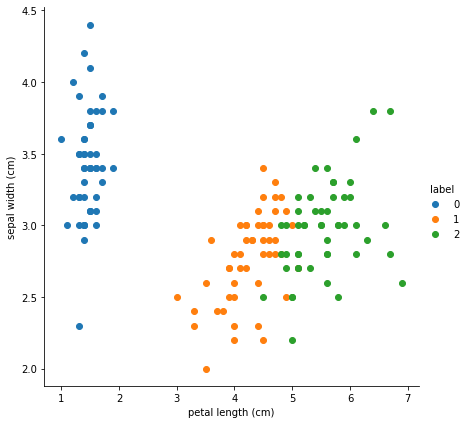

In [5]:
sns.FacetGrid(df, hue ="label",
			height = 6).map(plt.scatter,'petal length (cm)','sepal width (cm)').add_legend()

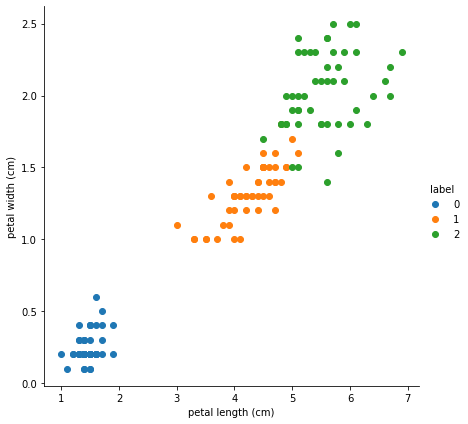

In [6]:
sns.FacetGrid(df, hue ="label",
			height = 6).map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()

In [7]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state = 0)

In [8]:
X.shape

(150, 4)

In [9]:
X_train.shape

(105, 4)

In [10]:
y.shape

(150,)

In [11]:
model = LogisticRegression(multi_class="multinomial")
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
print("train acc:",accuracy_score(y_pred_train, y_train)*100,"%")
print("test acc:",accuracy_score(y_pred_test, y_test)*100,"%")

train acc: 98.09523809523809 %
test acc: 97.77777777777777 %


In [13]:
cm_test = confusion_matrix(y_pred_test, y_test)
cm_test

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

In [14]:
f1_score(y_pred_test, y_test, average="macro")

0.975983436853002

C:\Users\Jay\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


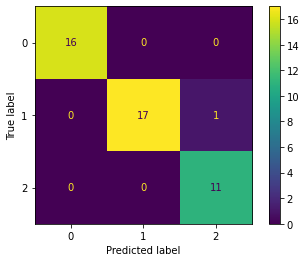

In [15]:
plot_confusion_matrix(model,X_test, y_test)

Confusion matrix shows that we have most of values as true positive while only one value of true negative

## Logistic regression from scratch

In [16]:
class logistic_regression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None  
        self.bias = None

    def sigmoid(self, x): # sgimoid function
        return 1 / (1 + np.exp(-x))

    def gradient_descent(self, X, Y, n_iters, lr):
        n_samples, n_features = X.shape
        cost_list = []

        for _ in range(n_iters):
          # y1 = X*W + b
          linear_model = np.dot(X, self.weights) + self.bias

          # y_pred = sigmoid(y1)
          Y_predicted = self.sigmoid(linear_model)
            
          # J = -(1/n) * sum(y*log(y_pred) + (1-y)*log(1-y_pred) )
          cost = -(1/n_features)*np.sum(Y*np.log(Y_predicted) + (1-Y)*np.log(1 - Y_predicted))
          cost_list.append(cost)

          # w = w - alpha * dw 
          # b = b - alpha * db
          dw = (1 / n_samples) * np.dot(X.T, (Y_predicted - Y))
          db = (1 / n_samples) * np.sum(Y_predicted - Y)

          self.weights -= self.lr * dw
          self.bias -= self.lr * db

        self.plot(n_iters,cost_list)

    def fit(self, X, Y):
        # getting shape pf training set 
        # to initialize weights and biases accordingly
        n_samples, n_features = X.shape

        # initialization of weights and biases
        self.weights = np.zeros(n_features)
        self.bias = 0

        self.gradient_descent(X, Y, self.n_iters, self.lr)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)

        # CLASSIFICATION
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def accuracy(self, y_train, y_test, y_pred_train, y_pred_test):
        acc =[] # 0 : train, 1 : test
        acc.append( accuracy_score(y_train, y_pred_train)*100 )
        acc.append( accuracy_score(y_test, y_pred_test)*100 )
        return acc

    # Plotting cost with respect to no of iterations
    def plot(self, n_iters, cost_list):
        i = range(n_iters)
        plt.plot(i , cost_list, color='red')
        plt.xlabel("NO OF ITERATIONS")
        plt.ylabel("COST VALUE")
        plt.show()



In [17]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [18]:
# generating dataset for classification
X,y = make_classification(n_features = 4, n_classes = 2)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# rescaling dataset using standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# range of data
print("X_train range: ",(X_train.min(),X_train.max() ) )
print("X_test range: ",(X_test.min(),X_test.max()) )

X_train range:  (-2.3208923815165634, 2.364170441559194)
X_test range:  (-2.4153262355123304, 1.83082774056084)


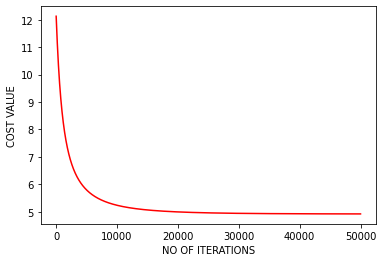


train accuracy: 92.85714285714286 %
test accuracy: 80.0 %

F1 (train)): 0.9284683570397856
F1 (test): 0.8026785714285716


In [19]:
# object of our Log reg. model
lr = logistic_regression(learning_rate=0.001, n_iters=50000)
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# finding accuracy
acc = lr.accuracy(y_train, y_test, y_pred_train, y_pred_test)
print("\ntrain accuracy:", acc[0],"%")
print("test accuracy:", acc[1],"%")

f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("\nF1 (train)):",f1_train)

f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 (test):",f1_test)

In [20]:
air_train = pd.read_csv("train.csv")
air_test = pd.read_csv("test.csv")

In [21]:
air_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [22]:
air_train.drop('id',axis=1,inplace=True)
air_train.drop('Unnamed: 0',axis=1,inplace=True)
air_test.drop('id',axis=1,inplace=True)
air_test.drop('Unnamed: 0',axis=1,inplace=True)

*removing spaces from column  names*

In [23]:
air_train.columns = air_train.columns.str.replace(" ", "_")
air_test.columns = air_test.columns.str.replace(" ", "_")

*checking for null values & removing if any*

In [24]:
air_train.isna().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [25]:
air_test.isna().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

In [26]:
air_train.dropna(axis=0,inplace=True)
air_test.dropna(axis=0,inplace=True)

In [27]:
air_train.isna().sum().sum()

0

In [28]:
air_test.isna().sum().sum()

0

In [29]:
air_train.head(10)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [30]:
air_train.select_dtypes(include=['object'])

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [31]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [32]:
obj_cols = air_train.select_dtypes(include='object').columns
for col in obj_cols:
    air_train[col] = lab_enc.fit_transform(air_train[col])
    air_test[col] = lab_enc.fit_transform(air_test[col])

In [33]:
air_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [34]:
air_test

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,0,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,0
25972,1,0,23,0,0,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,1
25973,0,0,17,1,1,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,0
25974,1,0,14,0,0,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,1


In [35]:
X_train = air_train.iloc[:,:-1]
X_test = air_test.iloc[:,:-1]
# y_train = air_train.iloc[:,-1].values.reshape(-1,1)
# y_test = air_test.iloc[:,-1].values.reshape(-1,1)
y_train = air_train.iloc[:,-1]
y_test = air_test.iloc[:,-1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(103594, 22) (103594,) (25893, 22) (25893,)


In [36]:
model = LogisticRegression(max_iter=10000)
model = model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_acc = accuracy_score(y_train, y_pred_train)*100
test_acc = accuracy_score(y_test, y_pred_test )*100
print("\ntrain accuracy:", train_acc,"%")
print("test accuracy:", test_acc,"%")


train accuracy: 87.54464544278626 %
test accuracy: 87.11620901401923 %


In [37]:
f1_train = f1_score(y_train, y_pred_train, average='weighted')
print("\nF1 (train)):",f1_train)

f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1 (test):",f1_test)


F1 (train)): 0.8750977695672063
F1 (test): 0.87082737361754
